# Setup

In [37]:
# Essentials
import math

L1 = 4.4
L2 = 6.2

In [38]:
# Conversion functions
def servo_to_physical_angle(servo_angle):
    physical_angle = -0.857 * servo_angle + 119.98
    return physical_angle

def physical_to_servo_angle(physical_angle):
    servo_angle = (119.98 - physical_angle) / 0.857
    return round(servo_angle)

In [39]:
# Forward and Invernse Kinematics
def calculate_leg_endpoint(hip_angle_deg, knee_angle_deg, L1, L2):
    hip_angle_rad = math.radians(hip_angle_deg)
    knee_angle_rad = math.radians(servo_to_physical_angle(knee_angle_deg))

    x = round((L1 + L2 * math.cos(knee_angle_rad)) * math.cos(hip_angle_rad), 2)
    y = round((L1 + L2 * math.cos(knee_angle_rad)) * math.sin(hip_angle_rad), 2)
    z = round(L2 * math.sin(knee_angle_rad), 2)

    return x, y, z

def inverse_kinematics(x, y, z, L1, L2):
    x, y, z = round(x, 2), round(y, 2), round(z, 2)

    d = math.sqrt(x**2 + y**2)
    r = math.sqrt(d**2 + z**2)

    theta1 = math.atan2(y, x)
    hip_angle_deg = math.degrees(theta1)

    if r < abs(L1 - L2) or r > (L1 + L2):
        raise ValueError("Target point is out of reach for the given arm dimensions.")


    cos_phi = (L1**2 + r**2 - L2**2) / (2 * L1 * r)
    cos_phi = max(min(cos_phi, 1), -1)
    phi = math.acos(cos_phi)
    alpha = math.atan2(z, d)
    hip_angle_adjusted_deg = math.degrees(alpha - phi)
    hip_servo_angle = hip_angle_deg + hip_angle_adjusted_deg

    cos_theta2 = (L1**2 + L2**2 - r**2) / (2 * L1 * L2)
    cos_theta2 = max(min(cos_theta2, 1), -1)
    theta2 = math.acos(cos_theta2)
    knee_physical_angle_deg = 180 - math.degrees(theta2)
    knee_servo_angle = physical_to_servo_angle(knee_physical_angle_deg)

    return round(hip_servo_angle), round(knee_servo_angle)

# Function test

In [ ]:
# Forward Kinematics
while True:
    hip_servo_angle, knee_servo_angle = map(int, input("Enter Angles: Hip,Knee: ").replace(" ", "").split(","))

    x, y, z = calculate_leg_endpoint(hip_servo_angle,knee_servo_angle, L1, L2)

    print(f"x predicted: {x}cm      ",f"Hip  servo angle given: {hip_servo_angle}°")
    print(f"y predicted: {y}cm      ",f"Knee servo angle given: {knee_servo_angle}°")
    print(f"z predicted: {z}cm      ",f"XYZ: {x}, {y}, {z}\n")

In [ ]:
# Inverse Kinematics
while True:
    x_input, y_input, z_input = map(float, input("Enter x, y, and z coordinates: ").replace(" ", "").split(","))

    hip_servo_angle, knee_servo_angle = inverse_kinematics(x_input, y_input, z_input, L1, L2)

    print(f"x given: {x_input}cm        ",f"Hip  servo angle predicted: {hip_servo_angle}°")
    print(f"y given: {y_input}cm        ",f"Knee servo angle predicted: {knee_servo_angle}°")
    print(f"z given: {z_input}cm        ",f"Angles: {hip_servo_angle}, {knee_servo_angle}\n")

# Compability test

In [ ]:
# Forward Kinematics to Inverse Kinematics
while True:
    hip_servo_angle, knee_servo_angle = map(int, input("Enter Angles: Hip,Knee: ").replace(" ", "").split(","))

    x, y, z = calculate_leg_endpoint(hip_servo_angle,knee_servo_angle, L1, L2)
    hip, knee = inverse_kinematics(x, y, z, L1, L2)
    
    print("----------------------------------------------------------------------")
    print("Forward Kinematics")
    print(f"x predicted: {x}cm      ",f"Hip  servo angle given: {hip_servo_angle}°")
    print(f"y predicted: {y}cm      ",f"Knee servo angle given: {knee_servo_angle}°")
    print(f"z predicted: {z}cm")
    print("")
    print("Inverse Kinematics")
    print(f"x given: {x}cm        ",f"Hip  servo angle predicted: {hip}°")
    print(f"y given: {y}cm        ",f"Knee servo angle predicted: {knee}°")
    print(f"z given: {z}cm")
    print("----------------------------------------------------------------------")

In [ ]:
# Inverse Kinematics to Forward Kinematics
while True:
    x_input, y_input, z_input = map(float, input("Enter x, y, and z coordinates: ").replace(" ", "").split(","))

    hip, knee = inverse_kinematics(x_input, y_input, z_input, L1, L2)
    x, y, z = calculate_leg_endpoint(hip,knee, L1, L2)
    
    print("----------------------------------------------------------------------")
    print("Inverse Kinematics")
    print(f"x given: {x_input}cm        ",f"Hip  servo angle predicted: {hip}°")
    print(f"y given: {y_input}cm        ",f"Knee servo angle predicted: {knee}°")
    print(f"z given: {z_input}cm")
    print("")
    print("Forward Kinematics")
    print(f"x predicted: {x}cm      ",f"Hip  servo angle given: {hip}°")
    print(f"y predicted: {y}cm      ",f"Knee servo angle given: {knee}°")
    print(f"z predicted: {z}cm")
    print("----------------------------------------------------------------------")

# Graph

0 110 0.0 4.4 -6.2


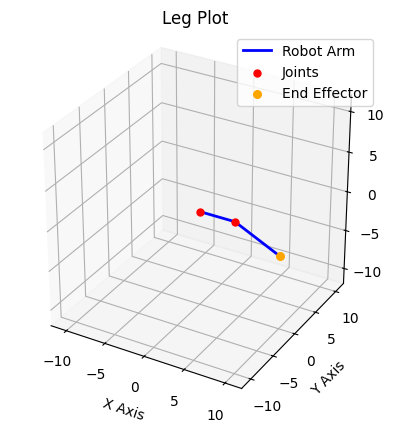

180 110 9.99 0.0 -2.69


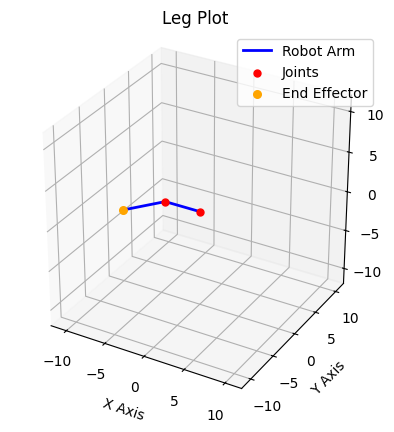

90 110 -9.99 0.0 -2.69


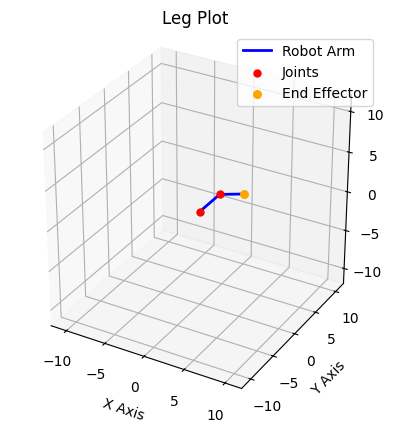

ValueError: invalid literal for int() with base 10: ''

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

while True:
    hip_servo_angle, knee_servo_angle = map(int, input("Enter Angles: Hip,Knee: ").replace(" ", "").split(","))
    print(hip_servo_angle,knee_servo_angle,x, y, z)

    x, y, z = calculate_leg_endpoint(hip_servo_angle,knee_servo_angle, L1, L2)
    x, y, z = x, y, -z

    # Convert angles to radians
    hip_angle_rad = math.radians(hip_servo_angle)
    knee_angle_rad = math.radians(knee_servo_angle)

    # Joint positions
    base = (0, 0, 0)
    joint = (L1 * math.cos(hip_angle_rad), L1 * math.sin(hip_angle_rad), 0)  # Joint position
    end_effector = (x, y, z)  # End effector position

    # Extract x, y, z coordinates for plotting
    x_coords = [base[0], joint[0], end_effector[0]]
    y_coords = [base[1], joint[1], end_effector[1]]
    z_coords = [base[2], joint[2], end_effector[2]]

    # Plotting
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot 
    ax.plot(x_coords, y_coords, z_coords, color='blue', linewidth=2, label='Robot Arm')
    ax.scatter(x_coords[0], y_coords[0], z_coords[0], color='red', s=25)
    ax.scatter(x_coords[1], y_coords[1], z_coords[1], color='red', s=25, label='Joints')
    ax.scatter(x_coords[-1], y_coords[-1], z_coords[-1], color='orange', s=30, label='End Effector')

    # Customize the plot
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_title('Leg Plot')
    ax.legend()
    ax.set_box_aspect([1, 1, 1])
    ax.grid(True)
    
    ax.set_xlim((-12, 12))
    ax.set_ylim((-12, 12))
    ax.set_zlim((-12, 12))
    
    ax.set_aspect('equal')
    
    plt.show()

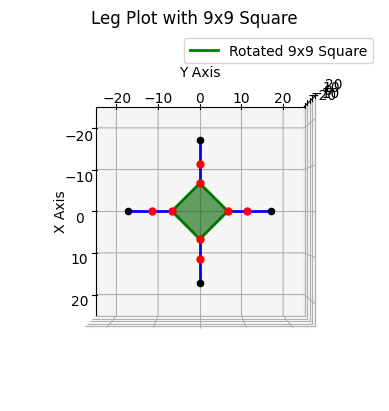

In [96]:
import matplotlib.pyplot as plt
import math
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#Square
square_size = 9
half_size = square_size / 2
square_x = [half_size, half_size, -half_size, -half_size, half_size]
square_y = [half_size, -half_size, -half_size, half_size, half_size]
square_z = [0, 0, 0, 0, 0]
theta = np.radians(45)
rotation_matrix = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [0, 0, 1]
])
rotated_coords = []
for i in range(4):
    point = np.array([square_x[i], square_y[i], square_z[i]])
    rotated_point = np.dot(rotation_matrix, point)
    rotated_coords.append(rotated_point)

# Extract the new x and y coordinates after rotation
rotated_square_x = [coord[0] for coord in rotated_coords]
rotated_square_y = [coord[1] for coord in rotated_coords]
rotated_square_z = [coord[2] for coord in rotated_coords]

# Plot the square as filled
ax.plot_trisurf(rotated_square_x, rotated_square_y, rotated_square_z, color='green', linewidth=0, antialiased=True, alpha=0.6, shade=True)
ax.plot(rotated_square_x + [rotated_square_x[0]], rotated_square_y + [rotated_square_y[0]], rotated_square_z + [rotated_square_z[0]], color='green', linewidth=2, label='Rotated 9x9 Square')

hip_servo_angle, knee_servo_angle = 90,110
x, y, z = calculate_leg_endpoint(hip_servo_angle, knee_servo_angle, L1, L2)
x, y, z = x, y, -z
hip_angle_rad = math.radians(hip_servo_angle)
knee_angle_rad = math.radians(knee_servo_angle)


# Plot square and robot legs
for i in range(4):


    base_x, base_y, base_z = rotated_square_x[i], rotated_square_y[i], rotated_square_z[i]
    joint_x, joint_y = (L1 * math.cos(hip_angle_rad), L1 * math.sin(hip_angle_rad))


    if i == 0:
        joint_x, joint_y = joint_x, joint_y
        xa, ya = x, y
    elif i == 1:
        joint_x, joint_y = joint_y, joint_x
        xa, ya = y, x    
    elif i == 2:
        joint_x, joint_y = -joint_x, -joint_y
        xa, ya = -x, -y
    elif i == 3:
        joint_x, joint_y = -joint_y, -joint_x
        xa, ya = -y, -x
    

    x_coords = [base_x, base_x + joint_x, base_x + xa]
    y_coords = [base_y, base_y + joint_y, base_y + ya]
    z_coords = [base_z, base_z, z] 

    ax.plot(x_coords, y_coords, z_coords, color='blue', linewidth=2)
    ax.scatter(x_coords[0], y_coords[0], z_coords[0], color='red', s=25)
    ax.scatter(x_coords[1], y_coords[1], z_coords[1], color='red', s=25)
    ax.scatter(x_coords[-1], y_coords[-1], z_coords[-1], color='black', s=20)

# Customize the plot
ax.view_init(elev=90, azim=0)
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_title('Leg Plot with 9x9 Square')
ax.legend()
ax.set_box_aspect([1, 1, 1])
ax.grid(True)
ax.set_xlim((-25, 25))
ax.set_ylim((-25, 25))
ax.set_zlim((-25, 25))
ax.set_aspect('equal')
plt.show()


In [ ]:
while True:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    square_size = 9
    half_size = square_size / 2
    bottom_z = -2.69

    # Define vertices for the top and bottom faces
    top_square = [
        [half_size, half_size, 0],
        [half_size, -half_size, 0],
        [-half_size, -half_size, 0],
        [-half_size, half_size, 0]
    ]

    bottom_square = [
        [half_size, half_size, bottom_z],
        [half_size, -half_size, bottom_z],
        [-half_size, -half_size, bottom_z],
        [-half_size, half_size, bottom_z]
    ]

    # Rotate the vertices
    theta = np.radians(45)
    rotation_matrix = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])

    rotated_top = [np.dot(rotation_matrix, point) for point in top_square]
    rotated_bottom = [np.dot(rotation_matrix, point) for point in bottom_square]

    # Extract x, y, z coordinates for plotting
    top_x = [p[0] for p in rotated_top]
    top_y = [p[1] for p in rotated_top]
    top_z = [p[2] for p in rotated_top]

    bottom_x = [p[0] for p in rotated_bottom]
    bottom_y = [p[1] for p in rotated_bottom]
    bottom_z = [p[2] for p in rotated_bottom]

    # Connect top and bottom faces
    for i in range(4):
        ax.plot([top_x[i], bottom_x[i]], [top_y[i], bottom_y[i]], [top_z[i], bottom_z[i]], color='green')

    # Plot top and bottom faces as filled surfaces
    ax.plot_trisurf(top_x, top_y, top_z, color='green', alpha=0.6, shade=True)
    ax.plot_trisurf(bottom_x, bottom_y, bottom_z, color='green', alpha=0.6, shade=True)

    # Connect legs to the cube
    hip_servo_angle, knee_servo_angle = map(int, input("Enter Angles: Hip,Knee: ").replace(" ", "").split(","))
    x, y, z = calculate_leg_endpoint(hip_servo_angle, knee_servo_angle, L1, L2)
    x, y, z = x, y, -z
    hip_angle_rad = math.radians(hip_servo_angle)
    knee_angle_rad = math.radians(knee_servo_angle)

    for i in range(4):
        base_x, base_y, base_z = top_x[i], top_y[i], top_z[i]
        joint_x, joint_y = (L1 * math.cos(hip_angle_rad), L1 * math.sin(hip_angle_rad))
        if i == 0:
            joint_x, joint_y = joint_x, joint_y
            xa, ya = x, y
        elif i == 1:
            joint_x, joint_y = joint_y, joint_x
            xa, ya = y, x    
        elif i == 2:
            joint_x, joint_y = -joint_x, -joint_y
            xa, ya = -x, -y
        elif i == 3:
            joint_x, joint_y = -joint_y, -joint_x
            xa, ya = -y, -x
        x_coords = [base_x, base_x + joint_x, base_x + xa]
        y_coords = [base_y, base_y + joint_y, base_y + ya]
        z_coords = [base_z, base_z, z] 
        ax.plot(x_coords, y_coords, z_coords, color='blue', linewidth=2)
        ax.scatter(x_coords[0], y_coords[0], z_coords[0], color='red', s=25)
        ax.scatter(x_coords[1], y_coords[1], z_coords[1], color='red', s=25)
        ax.scatter(x_coords[-1], y_coords[-1], z_coords[-1], color='black', s=20)

    ax.view_init(elev=90, azim=0)
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_title('Leg Plot with 9x9 Cube')
    ax.legend()
    ax.set_box_aspect([1, 1, 1])
    ax.grid(True)
    ax.set_xlim((-25, 25))
    ax.set_ylim((-25, 25))
    ax.set_zlim((-25, 25))
    ax.set_aspect('equal')
    plt.show()
